In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import os
print(os.listdir("../input"))
df=pd.read_csv("../input/german_credit_data.csv")
#df=pd.read_csv("german_credit_data.csv")
df.head(10)

['german_credit_data.csv']


,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car
5,5,35,male,1,free,NaN,NaN,9055,36,education
6,6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment
7,7,35,male,3,rent,little,moderate,6948,36,car
8,8,61,male,1,own,rich,NaN,3059,12,radio/TV
9,9,28,male,3,own,little,moderate,5234,30,car


checking for missing data in dataframe

In [2]:
df.isnull().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

In [3]:
df.drop("Checking account",axis="columns",inplace=True)

In [4]:
#lets work on the missing values
#we use fwd fill and back fill
df["Saving accounts"].fillna(method="bfill",inplace=True)

In [5]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Credit amount,Duration,Purpose
0,0,67,male,2,own,little,1169,6,radio/TV
1,1,22,female,2,own,little,5951,48,radio/TV
2,2,49,male,1,own,little,2096,12,education
3,3,45,male,2,free,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,4870,24,car


In [6]:
#dropping the first column as its of no use
df.drop(columns='Unnamed: 0',axis="columns",inplace=True)
df.head()

,Age,Sex,Job,Housing,Saving accounts,Credit amount,Duration,Purpose
0,67,male,2,own,little,1169,6,radio/TV
1,22,female,2,own,little,5951,48,radio/TV
2,49,male,1,own,little,2096,12,education
3,45,male,2,free,little,7882,42,furniture/equipment
4,53,male,2,free,little,4870,24,car


In [7]:
df.corrwith(df["Credit amount"],axis=0) #data corellation wih each other

Age              0.032716
Job              0.285385
Credit amount    1.000000
Duration         0.624984
dtype: float64

Taking care of categorical values

In [8]:
# we have categorical values like Sex, Job Housing and Purpose.
# Lets skip purpose from further analysis as its nota good parameter for the analysis as per my consideration.

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dfe=df.copy() # lets take a copy of dataframe for analysis
dfe.Sex=le.fit_transform(dfe.Sex)
dfe.Housing=le.fit_transform(dfe.Housing)
dfe["Saving accounts"]=le.fit_transform(dfe["Saving accounts"])

In [9]:
dfe.head(20)

,Age,Sex,Job,Housing,Saving accounts,Credit amount,Duration,Purpose
0,67,1,2,1,0,1169,6,radio/TV
1,22,0,2,1,0,5951,48,radio/TV
2,49,1,1,1,0,2096,12,education
3,45,1,2,0,0,7882,42,furniture/equipment
4,53,1,2,0,0,4870,24,car
5,35,1,1,0,2,9055,36,education
6,53,1,2,1,2,2835,24,furniture/equipment
7,35,1,3,2,0,6948,36,car
8,61,1,1,1,3,3059,12,radio/TV
9,28,1,3,1,0,5234,30,car


In [10]:
dfe1 =df.copy()
dfe.drop("Purpose",axis="columns",inplace=True)

In [11]:
df.corrwith(df["Credit amount"],axis=0) #data corellation wih each other

Age              0.032716
Job              0.285385
Credit amount    1.000000
Duration         0.624984
dtype: float64

# Visualisations

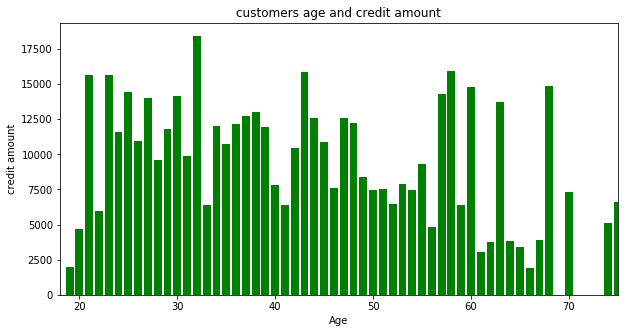

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,5))
plt.bar(df["Age"],df["Credit amount"],color="green")
#plt.scatter(df["Purpose"],df["Credit amount"],color="g")
plt.xlabel("Age")
plt.ylabel("credit amount")
plt.xlim(18,75)
plt.title("customers age and credit amount")
plt.show()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


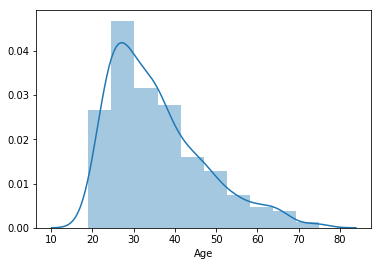

In [13]:
import seaborn as sns
sns.distplot(df["Age"],bins=10,kde=True)

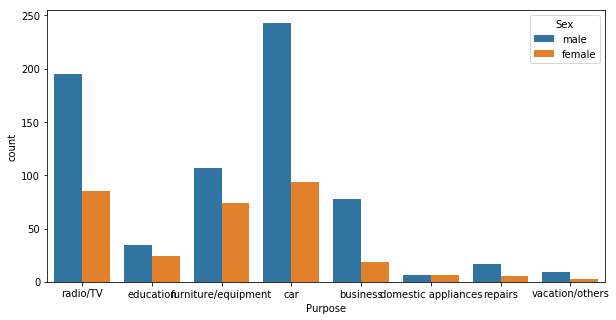

In [14]:
#count plot shows that distribution of loan purpose with Gender. like men took more car loans than women.
plt.figure(figsize=(10,5))
sns.countplot(x="Purpose",data=df,hue="Sex")

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


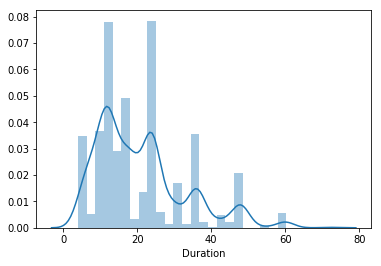

In [15]:
sns.distplot(df["Duration"]) 
# distribution of loans based on duration. Max loans are high duration one.

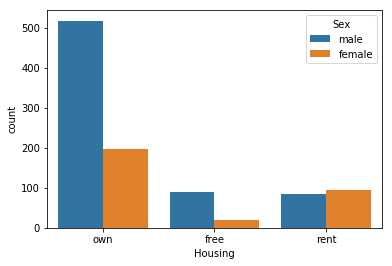

In [16]:
sns.countplot(x="Housing",data=df,hue="Sex") # maximum loan applicants are male with on housing

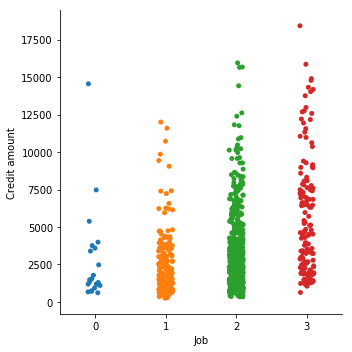

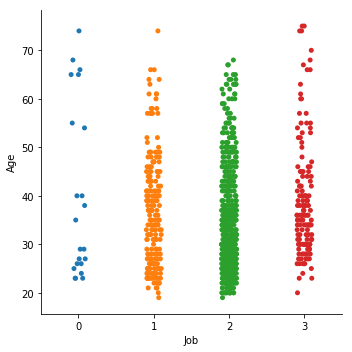

In [17]:
#categorical plotting #tip: put x axis as categorical value
#jobs and loan stats
#Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)
sns.catplot(x="Job",y="Credit amount",data=df)
sns.catplot(x="Job",y="Age",data=df)
#Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)

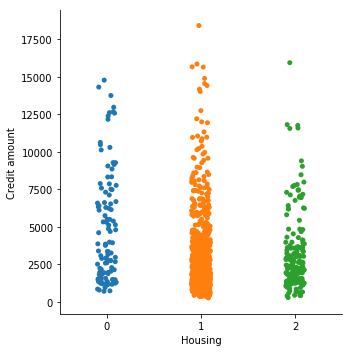

In [18]:
sns.catplot(x="Housing",y="Credit amount",data=dfe)


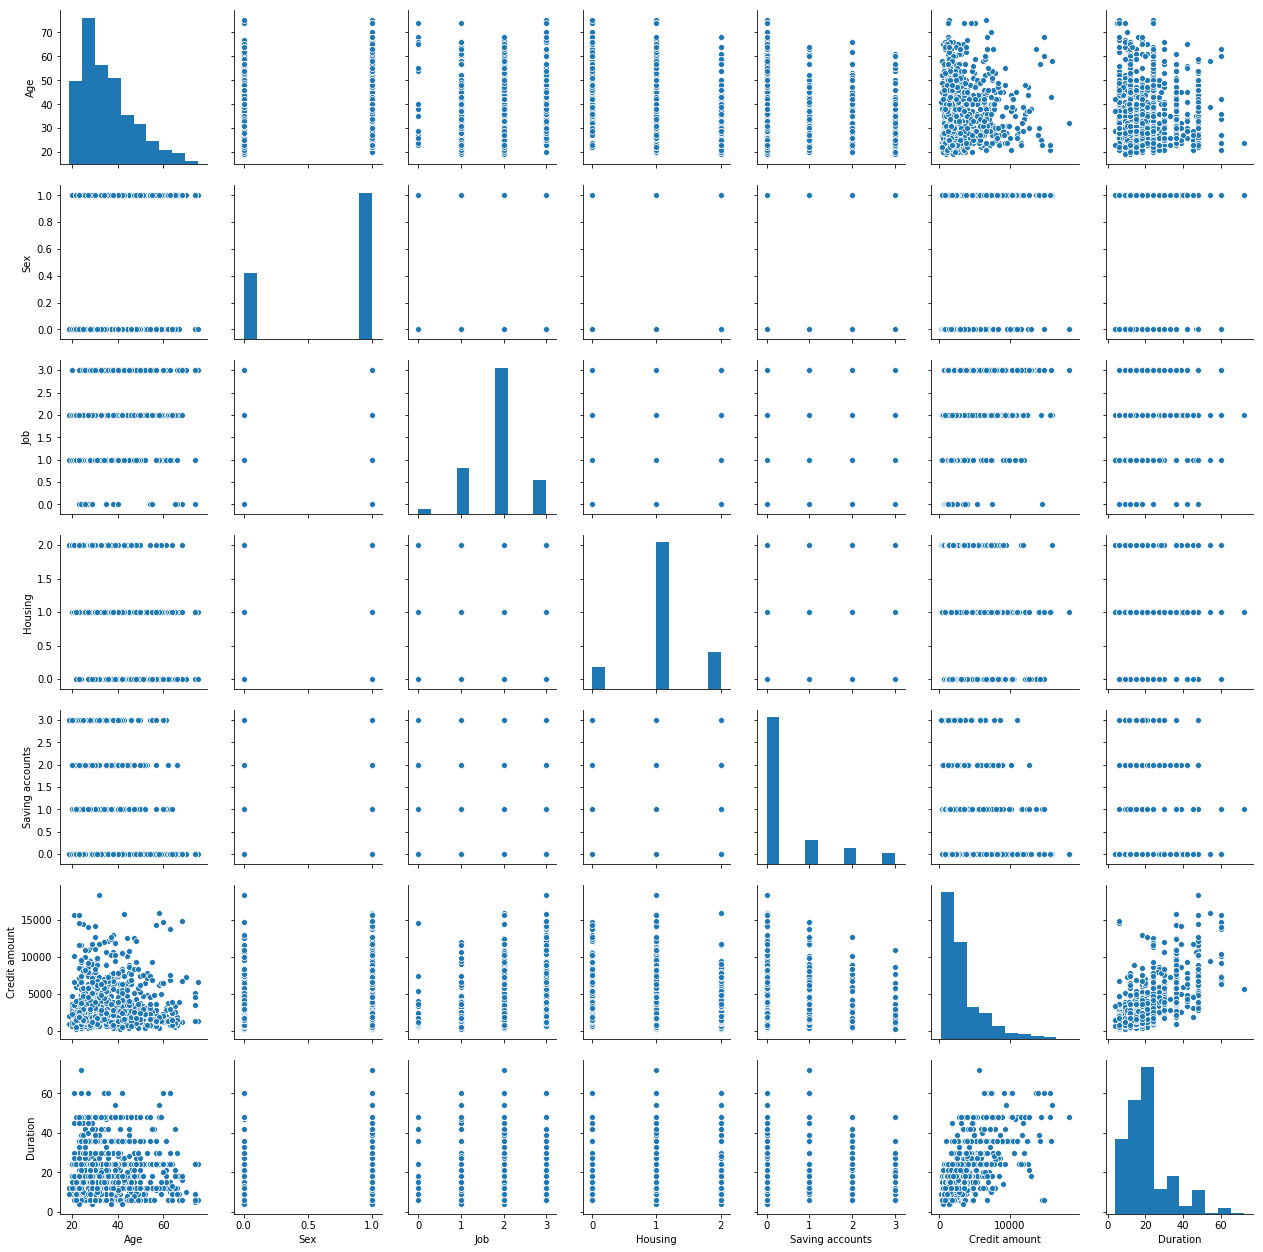

In [19]:
sns.pairplot(dfe)

In [20]:
dfe.corrwith(dfe["Credit amount"],axis=0) #data corellation wih each other

Age                0.032716
Sex                0.093482
Job                0.285385
Housing           -0.135632
Saving accounts   -0.042306
Credit amount      1.000000
Duration           0.624984
dtype: float64

In [21]:
dfe.head()

,Age,Sex,Job,Housing,Saving accounts,Credit amount,Duration
0,67,1,2,1,0,1169,6
1,22,0,2,1,0,5951,48
2,49,1,1,1,0,2096,12
3,45,1,2,0,0,7882,42
4,53,1,2,0,0,4870,24


In [22]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Credit amount',
       'Duration', 'Purpose'],
      dtype='object')

In [23]:
dfe1 = df.copy()
dfe1.drop('Saving accounts', axis = 1, inplace = True)
dfe1.Job = dfe1.Job.astype(str)
dfe1 = dfe1[[ 'Job','Sex','Age','Credit amount', 'Duration','Housing', 'Purpose']]
X1 = pd.get_dummies(dfe1)
X1.head()

,Age,Credit amount,Duration,Job_0,Job_1,Job_2,Job_3,Sex_female,Sex_male,Housing_free,Housing_own,Housing_rent,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,67,1169,6,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0
1,22,5951,48,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0
2,49,2096,12,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0
3,45,7882,42,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0
4,53,4870,24,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0


In [24]:
# #Machine learning process started
# X=dfe[[ 'Job','Sex','Age','Credit amount', 'Duration']]
# X

Scaling the data to remove disparity

In [25]:
#scaling the features for the model.
#minmax scaler gave score as -54 
# from sklearn.preprocessing import MinMaxScaler
# mm=MinMaxScaler()
# X=mm.fit_transform(X1)
#normalize gave score -192
from sklearn.preprocessing import normalize
X=normalize(X1)

#satandard scaler was worst
# from sklearn.preprocessing import StandardScaler
# sk=StandardScaler()
# X=sk.fit_transform(X)


Text(0.5, 1.0, 'Elbow curve')

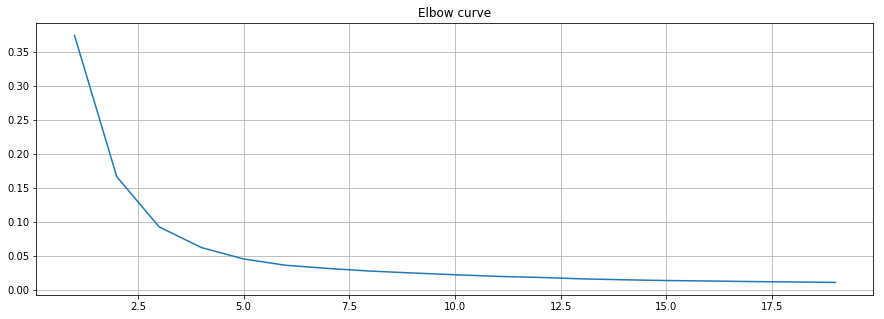

In [26]:
#elbow plot to find then_clusters valuefor KMEANS algorithm
#to find SSE or sum square error
distorsions = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(1,20), distorsions)
plt.grid(True)
plt.title('Elbow curve')

In [27]:
#ML model KMeans
from sklearn.cluster import KMeans
km=KMeans(n_clusters=5, max_iter=10000,random_state=None)
km.fit_transform(X)

array([[0.03746379, 0.07547983, 0.0138323 , 0.04946748, 0.02105305],
       [0.01652361, 0.12749754, 0.06370006, 0.0046555 , 0.03454983],
       [0.00536997, 0.10843047, 0.04461358, 0.01559089, 0.01633458],
       ...,
       [0.02763442, 0.08351422, 0.01984157, 0.04049732, 0.00964452],
       [0.01638781, 0.11768564, 0.05539478, 0.0190939 , 0.02773251],
       [0.01421466, 0.12509852, 0.06133893, 0.00438542, 0.03213537]])

The k-means score is an indication of how far the points are from the centroids. In scikit learn, the score is better the closer to zero it is.

Bad scores will return a large negative number, whereas good scores return close to zero. Generally, you will want to take the absolute value of the output from the scores method for better visualization.

In [28]:
km.score(X)# negetive score does not mean bad model

-0.045904956095862315

The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b). To clarify, b is the distance between a sample and the nearest cluster that the sample is not a part of. Note that Silhouette Coefficient is only defined if number of labels is 2 <= n_labels <= n_samples - 1.

The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.

In [29]:
from sklearn.metrics import silhouette_score
silhouette_score(X, km.labels_)

0.4704378330787688